<center>
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ

НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ

«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ
імені ІГОРЯ СІКОРСЬКОГО»

Навчально-науковий інститут прикладного системного аналізу
Кафедра штучного інтелекту


Звіт

про виконання лабораторної роботи №3

з дисципліни «Інтелектуальний аналіз даних»



Виконали:

студент III курсу, груп КІ-33 та КІ-31
Тал Майк, Піддубна Марія, Владислав Дмитренко

Прийняв:
Викладач: Андросов Д.В.







Київ – 2025
</center>

# Практикум №3: Класифікація на основі багатошарового персептрона (MLP)

## Мета роботи:
- Реалізувати класифікацію за допомогою MLPClassifier
- Почати з моделі з одним скритим шаром
- Динамічно додавати нейрони до скритого шару
- Визначити оптимальну кількість нейронів
- При необхідності реалізувати багатошарову модель

## Крок 1: Імпорт бібліотек та завантаження даних

In [56]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Налаштування для візуалізації
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

### Завантаження датасетів
Використовуємо ті ж самі дані, що й у Практикумі №2:
- **XOR dataset** - синтетичні дані для перевірки можливості розділення нелінійних класів
- **Iris dataset** - реальні дані про квіти ірисів

In [57]:
# Датасет (а) - XOR dataset
np.random.seed(42)
X_xor = np.random.randn(300, 2)
Y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0).astype(int)

# Датасет (б) - Iris dataset
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Датасети завантажені:")
print(f"  XOR: {X_xor.shape[0]} зразків, {X_xor.shape[1]} ознак, {len(np.unique(Y_xor))} класів")
print(f"  Iris: {X_iris.shape[0]} зразків, {X_iris.shape[1]} ознак, {len(np.unique(Y_iris))} класів")

Датасети завантажені:
  XOR: 300 зразків, 2 ознак, 2 класів
  Iris: 150 зразків, 4 ознак, 3 класів


### Розбиття на навчальний та валідаційний набори

In [58]:
# Розбиття XOR dataset (70% - навчання, 30% - валідація)
X_xor_train, X_xor_val, Y_xor_train, Y_xor_val = train_test_split(
    X_xor, Y_xor, test_size=0.3, random_state=42, stratify=Y_xor
)

# Розбиття Iris dataset
X_iris_train, X_iris_val, Y_iris_train, Y_iris_val = train_test_split(
    X_iris, Y_iris, test_size=0.3, random_state=42, stratify=Y_iris
)

print("Дані розбито на навчальні та валідаційні набори:")
print(f"\nXOR Dataset:")
print(f"  Навчальний: {X_xor_train.shape[0]} зразків")
print(f"  Валідаційний: {X_xor_val.shape[0]} зразків")

print(f"\nIris Dataset:")
print(f"  Навчальний: {X_iris_train.shape[0]} зразків")
print(f"  Валідаційний: {X_iris_val.shape[0]} зразків")

Дані розбито на навчальні та валідаційні набори:

XOR Dataset:
  Навчальний: 210 зразків
  Валідаційний: 90 зразків

Iris Dataset:
  Навчальний: 105 зразків
  Валідаційний: 45 зразків


## Крок 2: MLP з одним скритим шаром - додавання нейронів

Тестуємо різну кількість нейронів у одному скритому шарі: 2, 5, 10, 20, 50, 100

In [59]:
# Список кількостей нейронів для тестування
neuron_counts = [2, 5, 10, 20, 50, 100, 250, 1000]

# Словники для збереження результатів
results_xor = {'neurons': [], 'train_acc': [], 'val_acc': [], 'models': []}
results_iris = {'neurons': [], 'train_acc': [], 'val_acc': [], 'models': []}

print("="*70)
print("ТЕСТУВАННЯ MLP З ОДНИМ СКРИТИМ ШАРОМ")
print("="*70)

# Тестування на XOR dataset
print("\n--- XOR DATASET ---\n")
for n_neurons in neuron_counts:
    # Створюємо модель з одним скритим шаром
    # hidden_layer_sizes=(n_neurons,) - один шар з n_neurons нейронів
    model = MLPClassifier(
        hidden_layer_sizes=(n_neurons,),
        activation='relu',  # функція активації
        solver='adam',      # алгоритм оптимізації
        max_iter=2000,      # максимальна кількість ітерацій
        random_state=42
    )
    
    # Навчаємо модель
    model.fit(X_xor_train, Y_xor_train)
    
    # Обчислюємо точність
    train_acc = accuracy_score(Y_xor_train, model.predict(X_xor_train))
    val_acc = accuracy_score(Y_xor_val, model.predict(X_xor_val))
    
    # Зберігаємо результати
    results_xor['neurons'].append(n_neurons)
    results_xor['train_acc'].append(train_acc)
    results_xor['val_acc'].append(val_acc)
    results_xor['models'].append(model)
    
    print(f"Кількість нейронів: {n_neurons:3d}  |  "
          f"Точність (навч.): {train_acc:.4f}  |  "
          f"Точність (валід.): {val_acc:.4f}")

# Тестування на Iris dataset
print("\n--- IRIS DATASET ---\n")
for n_neurons in neuron_counts:
    model = MLPClassifier(
        hidden_layer_sizes=(n_neurons,),
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42
    )
    
    model.fit(X_iris_train, Y_iris_train)
    
    train_acc = accuracy_score(Y_iris_train, model.predict(X_iris_train))
    val_acc = accuracy_score(Y_iris_val, model.predict(X_iris_val))
    
    results_iris['neurons'].append(n_neurons)
    results_iris['train_acc'].append(train_acc)
    results_iris['val_acc'].append(val_acc)
    results_iris['models'].append(model)
    
    print(f"Кількість нейронів: {n_neurons:3d}  |  "
          f"Точність (навч.): {train_acc:.4f}  |  "
          f"Точність (валід.): {val_acc:.4f}")

print("\n" + "="*70)

ТЕСТУВАННЯ MLP З ОДНИМ СКРИТИМ ШАРОМ

--- XOR DATASET ---

Кількість нейронів:   2  |  Точність (навч.): 0.6905  |  Точність (валід.): 0.7333
Кількість нейронів:   5  |  Точність (навч.): 0.9381  |  Точність (валід.): 0.8889
Кількість нейронів:  10  |  Точність (навч.): 0.9762  |  Точність (валід.): 0.9444
Кількість нейронів:  20  |  Точність (навч.): 0.9762  |  Точність (валід.): 0.9778
Кількість нейронів:  50  |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778
Кількість нейронів: 100  |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778
Кількість нейронів: 250  |  Точність (навч.): 0.9667  |  Точність (валід.): 0.9778
Кількість нейронів: 1000  |  Точність (навч.): 0.9571  |  Точність (валід.): 0.9889

--- IRIS DATASET ---

Кількість нейронів:   2  |  Точність (навч.): 0.9619  |  Точність (валід.): 0.9778
Кількість нейронів:   5  |  Точність (навч.): 0.9714  |  Точність (валід.): 1.0000
Кількість нейронів:  10  |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778
Кіль

### Візуалізація залежності точності від кількості нейронів

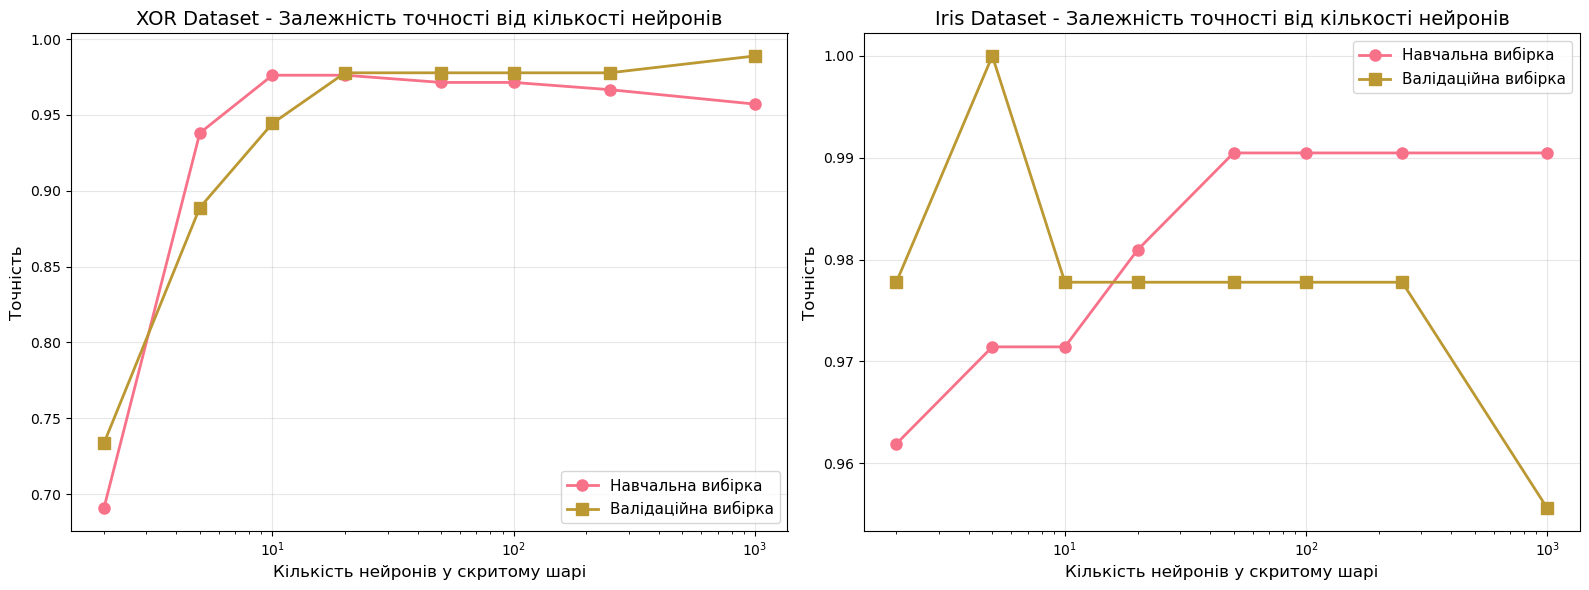

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# XOR Dataset
axes[0].plot(results_xor['neurons'], results_xor['train_acc'], 
             'o-', label='Навчальна вибірка', linewidth=2, markersize=8)
axes[0].plot(results_xor['neurons'], results_xor['val_acc'], 
             's-', label='Валідаційна вибірка', linewidth=2, markersize=8)
axes[0].set_xlabel('Кількість нейронів у скритому шарі', fontsize=12)
axes[0].set_ylabel('Точність', fontsize=12)
axes[0].set_title('XOR Dataset - Залежність точності від кількості нейронів', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xscale('log')

# Iris Dataset
axes[1].plot(results_iris['neurons'], results_iris['train_acc'], 
             'o-', label='Навчальна вибірка', linewidth=2, markersize=8)
axes[1].plot(results_iris['neurons'], results_iris['val_acc'], 
             's-', label='Валідаційна вибірка', linewidth=2, markersize=8)
axes[1].set_xlabel('Кількість нейронів у скритому шарі', fontsize=12)
axes[1].set_ylabel('Точність', fontsize=12)
axes[1].set_title('Iris Dataset - Залежність точності від кількості нейронів', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

### Визначення оптимальної кількості нейронів

In [61]:
# Знаходимо оптимальну кількість нейронів (максимальна точність на валідації)
best_idx_xor = np.argmax(results_xor['val_acc'])
best_neurons_xor = results_xor['neurons'][best_idx_xor]
best_val_acc_xor = results_xor['val_acc'][best_idx_xor]

best_idx_iris = np.argmax(results_iris['val_acc'])
best_neurons_iris = results_iris['neurons'][best_idx_iris]
best_val_acc_iris = results_iris['val_acc'][best_idx_iris]

print("="*70)
print("ОПТИМАЛЬНА КОНФІГУРАЦІЯ ДЛЯ ОДНОШАРОВОЇ МОДЕЛІ")
print("="*70)
print(f"\nXOR Dataset:")
print(f"  Оптимальна кількість нейронів: {best_neurons_xor}")
print(f"  Точність на валідації: {best_val_acc_xor:.4f}")
print(f"  Точність на навчанні: {results_xor['train_acc'][best_idx_xor]:.4f}")
print(f"  Різниця (overfitting): {results_xor['train_acc'][best_idx_xor] - best_val_acc_xor:.4f}")

print(f"\nIris Dataset:")
print(f"  Оптимальна кількість нейронів: {best_neurons_iris}")
print(f"  Точність на валідації: {best_val_acc_iris:.4f}")
print(f"  Точність на навчанні: {results_iris['train_acc'][best_idx_iris]:.4f}")
print(f"  Різниця (overfitting): {results_iris['train_acc'][best_idx_iris] - best_val_acc_iris:.4f}")
print("\n" + "="*70)

ОПТИМАЛЬНА КОНФІГУРАЦІЯ ДЛЯ ОДНОШАРОВОЇ МОДЕЛІ

XOR Dataset:
  Оптимальна кількість нейронів: 1000
  Точність на валідації: 0.9889
  Точність на навчанні: 0.9571
  Різниця (overfitting): -0.0317

Iris Dataset:
  Оптимальна кількість нейронів: 5
  Точність на валідації: 1.0000
  Точність на навчанні: 0.9714
  Різниця (overfitting): -0.0286



## Крок 3: Багатошарова MLP

Тепер додамо кілька скритих шарів та порівняємо результати

In [62]:
# Конфігурації багатошарових моделей
multilayer_configs = [
    (10, 10),        # 2 шари по 10 нейронів
    (20, 10),        # 2 шари: 20 та 10 нейронів
    (50, 25),        # 2 шари: 50 та 25 нейронів
    (20, 20, 10),    # 3 шари
    (50, 25, 10),    # 3 шари
    (100, 50, 25),   # 3 шари великі
]

# Словники для результатів
multi_results_xor = {'config': [], 'train_acc': [], 'val_acc': [], 'models': []}
multi_results_iris = {'config': [], 'train_acc': [], 'val_acc': [], 'models': []}

print("="*70)
print("ТЕСТУВАННЯ БАГАТОШАРОВИХ MLP")
print("="*70)

# XOR Dataset
print("\n--- XOR DATASET ---\n")
for config in multilayer_configs:
    model = MLPClassifier(
        hidden_layer_sizes=config,
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42
    )
    
    model.fit(X_xor_train, Y_xor_train)
    
    train_acc = accuracy_score(Y_xor_train, model.predict(X_xor_train))
    val_acc = accuracy_score(Y_xor_val, model.predict(X_xor_val))
    
    multi_results_xor['config'].append(config)
    multi_results_xor['train_acc'].append(train_acc)
    multi_results_xor['val_acc'].append(val_acc)
    multi_results_xor['models'].append(model)
    
    config_str = '-'.join(map(str, config))
    print(f"Конфігурація: {config_str:15s}  |  "
          f"Точність (навч.): {train_acc:.4f}  |  "
          f"Точність (валід.): {val_acc:.4f}")

# Iris Dataset
print("\n--- IRIS DATASET ---\n")
for config in multilayer_configs:
    model = MLPClassifier(
        hidden_layer_sizes=config,
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42
    )
    
    model.fit(X_iris_train, Y_iris_train)
    
    train_acc = accuracy_score(Y_iris_train, model.predict(X_iris_train))
    val_acc = accuracy_score(Y_iris_val, model.predict(X_iris_val))
    
    multi_results_iris['config'].append(config)
    multi_results_iris['train_acc'].append(train_acc)
    multi_results_iris['val_acc'].append(val_acc)
    multi_results_iris['models'].append(model)
    
    config_str = '-'.join(map(str, config))
    print(f"Конфігурація: {config_str:15s}  |  "
          f"Точність (навч.): {train_acc:.4f}  |  "
          f"Точність (валід.): {val_acc:.4f}")

print("\n" + "="*70)

ТЕСТУВАННЯ БАГАТОШАРОВИХ MLP

--- XOR DATASET ---

Конфігурація: 10-10            |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9444
Конфігурація: 20-10            |  Точність (навч.): 0.9857  |  Точність (валід.): 0.9667
Конфігурація: 50-25            |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9667
Конфігурація: 20-20-10         |  Точність (навч.): 0.9810  |  Точність (валід.): 0.9778
Конфігурація: 50-25-10         |  Точність (навч.): 0.9667  |  Точність (валід.): 0.9667
Конфігурація: 100-50-25        |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778

--- IRIS DATASET ---

Конфігурація: 10-10            |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778
Конфігурація: 20-10            |  Точність (навч.): 0.9905  |  Точність (валід.): 0.9778
Конфігурація: 50-25            |  Точність (навч.): 1.0000  |  Точність (валід.): 0.9556
Конфігурація: 20-20-10         |  Точність (навч.): 0.9810  |  Точність (валід.): 0.9778
Конфігурація: 50-25-10         |  То

### Порівняння одношарової та багатошарової моделей

In [63]:
# Найкраща багатошарова модель
best_multi_idx_xor = np.argmax(multi_results_xor['val_acc'])
best_multi_config_xor = multi_results_xor['config'][best_multi_idx_xor]
best_multi_val_xor = multi_results_xor['val_acc'][best_multi_idx_xor]

best_multi_idx_iris = np.argmax(multi_results_iris['val_acc'])
best_multi_config_iris = multi_results_iris['config'][best_multi_idx_iris]
best_multi_val_iris = multi_results_iris['val_acc'][best_multi_idx_iris]

print("="*70)
print("ПОРІВНЯННЯ ОДНОШАРОВОЇ ТА БАГАТОШАРОВОЇ МОДЕЛЕЙ")
print("="*70)

print("\n--- XOR DATASET ---")
print(f"\nОдношарова модель:")
print(f"  Конфігурація: ({best_neurons_xor},)")
print(f"  Точність на валідації: {best_val_acc_xor:.4f}")

print(f"\nБагатошарова модель:")
print(f"  Конфігурація: {best_multi_config_xor}")
print(f"  Точність на валідації: {best_multi_val_xor:.4f}")

improvement_xor = best_multi_val_xor - best_val_acc_xor
print(f"\n  Покращення: {improvement_xor:+.4f}")
if improvement_xor > 0.01:
    print("    Багатошарова модель краща!")
elif improvement_xor < -0.01:
    print("    Одношарова модель достатня!")
else:
    print("  = Моделі показують схожі результати")

print("\n--- IRIS DATASET ---")
print(f"\nОдношарова модель:")
print(f"  Конфігурація: ({best_neurons_iris},)")
print(f"  Точність на валідації: {best_val_acc_iris:.4f}")

print(f"\nБагатошарова модель:")
print(f"  Конфігурація: {best_multi_config_iris}")
print(f"  Точність на валідації: {best_multi_val_iris:.4f}")

improvement_iris = best_multi_val_iris - best_val_acc_iris
print(f"\n  Покращення: {improvement_iris:+.4f}")
if improvement_iris > 0.01:
    print("    Багатошарова модель краща!")
elif improvement_iris < -0.01:
    print("    Одношарова модель достатня!")
else:
    print("  = Моделі показують схожі результати")

print("\n" + "="*70)

ПОРІВНЯННЯ ОДНОШАРОВОЇ ТА БАГАТОШАРОВОЇ МОДЕЛЕЙ

--- XOR DATASET ---

Одношарова модель:
  Конфігурація: (1000,)
  Точність на валідації: 0.9889

Багатошарова модель:
  Конфігурація: (20, 20, 10)
  Точність на валідації: 0.9778

  Покращення: -0.0111
    Одношарова модель достатня!

--- IRIS DATASET ---

Одношарова модель:
  Конфігурація: (5,)
  Точність на валідації: 1.0000

Багатошарова модель:
  Конфігурація: (10, 10)
  Точність на валідації: 0.9778

  Покращення: -0.0222
    Одношарова модель достатня!



## Крок 4: Детальний аналіз найкращих моделей

In [64]:
# Беремо найкращі моделі
best_model_xor = results_xor['models'][best_idx_xor] if best_val_acc_xor >= best_multi_val_xor else multi_results_xor['models'][best_multi_idx_xor]
best_model_iris = results_iris['models'][best_idx_iris] if best_val_acc_iris >= best_multi_val_iris else multi_results_iris['models'][best_multi_idx_iris]

# XOR Dataset - Матриця помилок
print("="*70)
print("ДЕТАЛЬНИЙ АНАЛІЗ НАЙКРАЩИХ МОДЕЛЕЙ")
print("="*70)

print("\n--- XOR DATASET ---")
Y_xor_pred = best_model_xor.predict(X_xor_val)
print("\nМатриця помилок:")
cm_xor = confusion_matrix(Y_xor_val, Y_xor_pred)
print(cm_xor)

print("\nЗвіт класифікації:")
print(classification_report(Y_xor_val, Y_xor_pred, target_names=['Class 0', 'Class 1']))

# Iris Dataset
print("\n--- IRIS DATASET ---")
Y_iris_pred = best_model_iris.predict(X_iris_val)
print("\nМатриця помилок:")
cm_iris = confusion_matrix(Y_iris_val, Y_iris_pred)
print(cm_iris)

print("\nЗвіт класифікації:")
print(classification_report(Y_iris_val, Y_iris_pred, target_names=target_names))

ДЕТАЛЬНИЙ АНАЛІЗ НАЙКРАЩИХ МОДЕЛЕЙ

--- XOR DATASET ---

Матриця помилок:
[[43  1]
 [ 0 46]]

Звіт класифікації:
              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99        44
     Class 1       0.98      1.00      0.99        46

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


--- IRIS DATASET ---

Матриця помилок:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]

Звіт класифікації:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Візуалізація матриць помилок

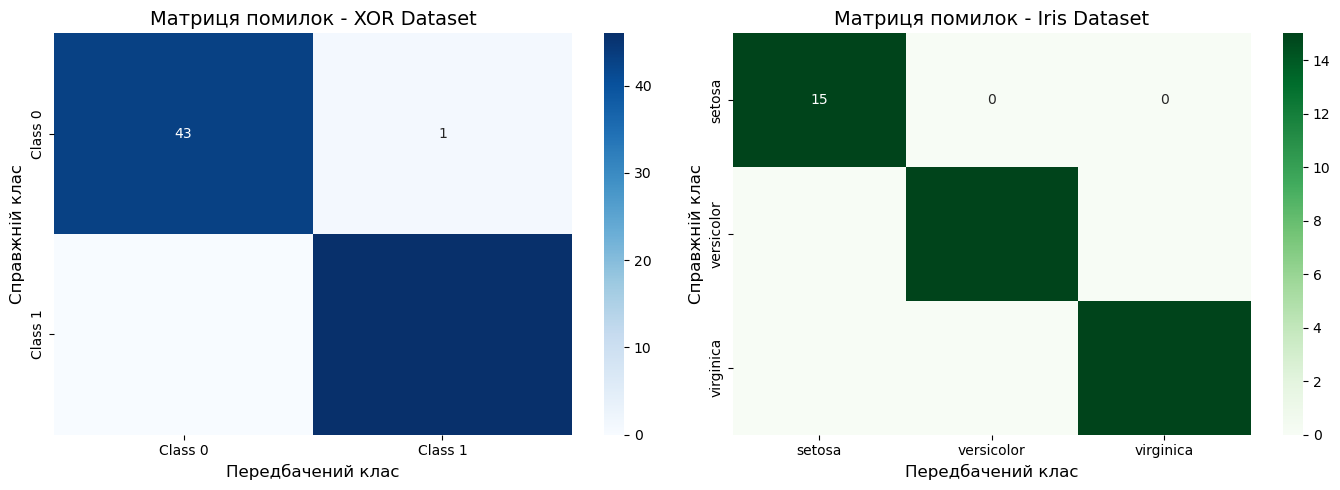

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# XOR Dataset
sns.heatmap(cm_xor, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
axes[0].set_title('Матриця помилок - XOR Dataset', fontsize=14)
axes[0].set_ylabel('Справжній клас', fontsize=12)
axes[0].set_xlabel('Передбачений клас', fontsize=12)

# Iris Dataset
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=target_names,
            yticklabels=target_names)
axes[1].set_title('Матриця помилок - Iris Dataset', fontsize=14)
axes[1].set_ylabel('Справжній клас', fontsize=12)
axes[1].set_xlabel('Передбачений клас', fontsize=12)

plt.tight_layout()
plt.show()

## Крок 5: Візуалізація меж прийняття рішень (Decision Boundaries)

In [66]:
def plot_decision_boundary(model, X, Y, ax, title, class_names=None):
    """Функція для візуалізації меж класів"""
    h = 0.02  # крок сітки
    
    # Створюємо сітку точок
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Передбачаємо клас для кожної точки сітки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Малюємо межі
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Малюємо точки даних
    colors = ['red', 'green', 'blue']
    for i in range(len(np.unique(Y))):
        mask = Y == i
        label = class_names[i] if class_names is not None else f'Class {i}'
        ax.scatter(X[mask, 0], X[mask, 1], c=colors[i], 
                  label=label, edgecolors='black', s=50, alpha=0.8)
    
    ax.set_title(title, fontsize=13)
    ax.legend()
    ax.grid(True, alpha=0.2)

Створюємо візуалізацію меж прийняття рішень...


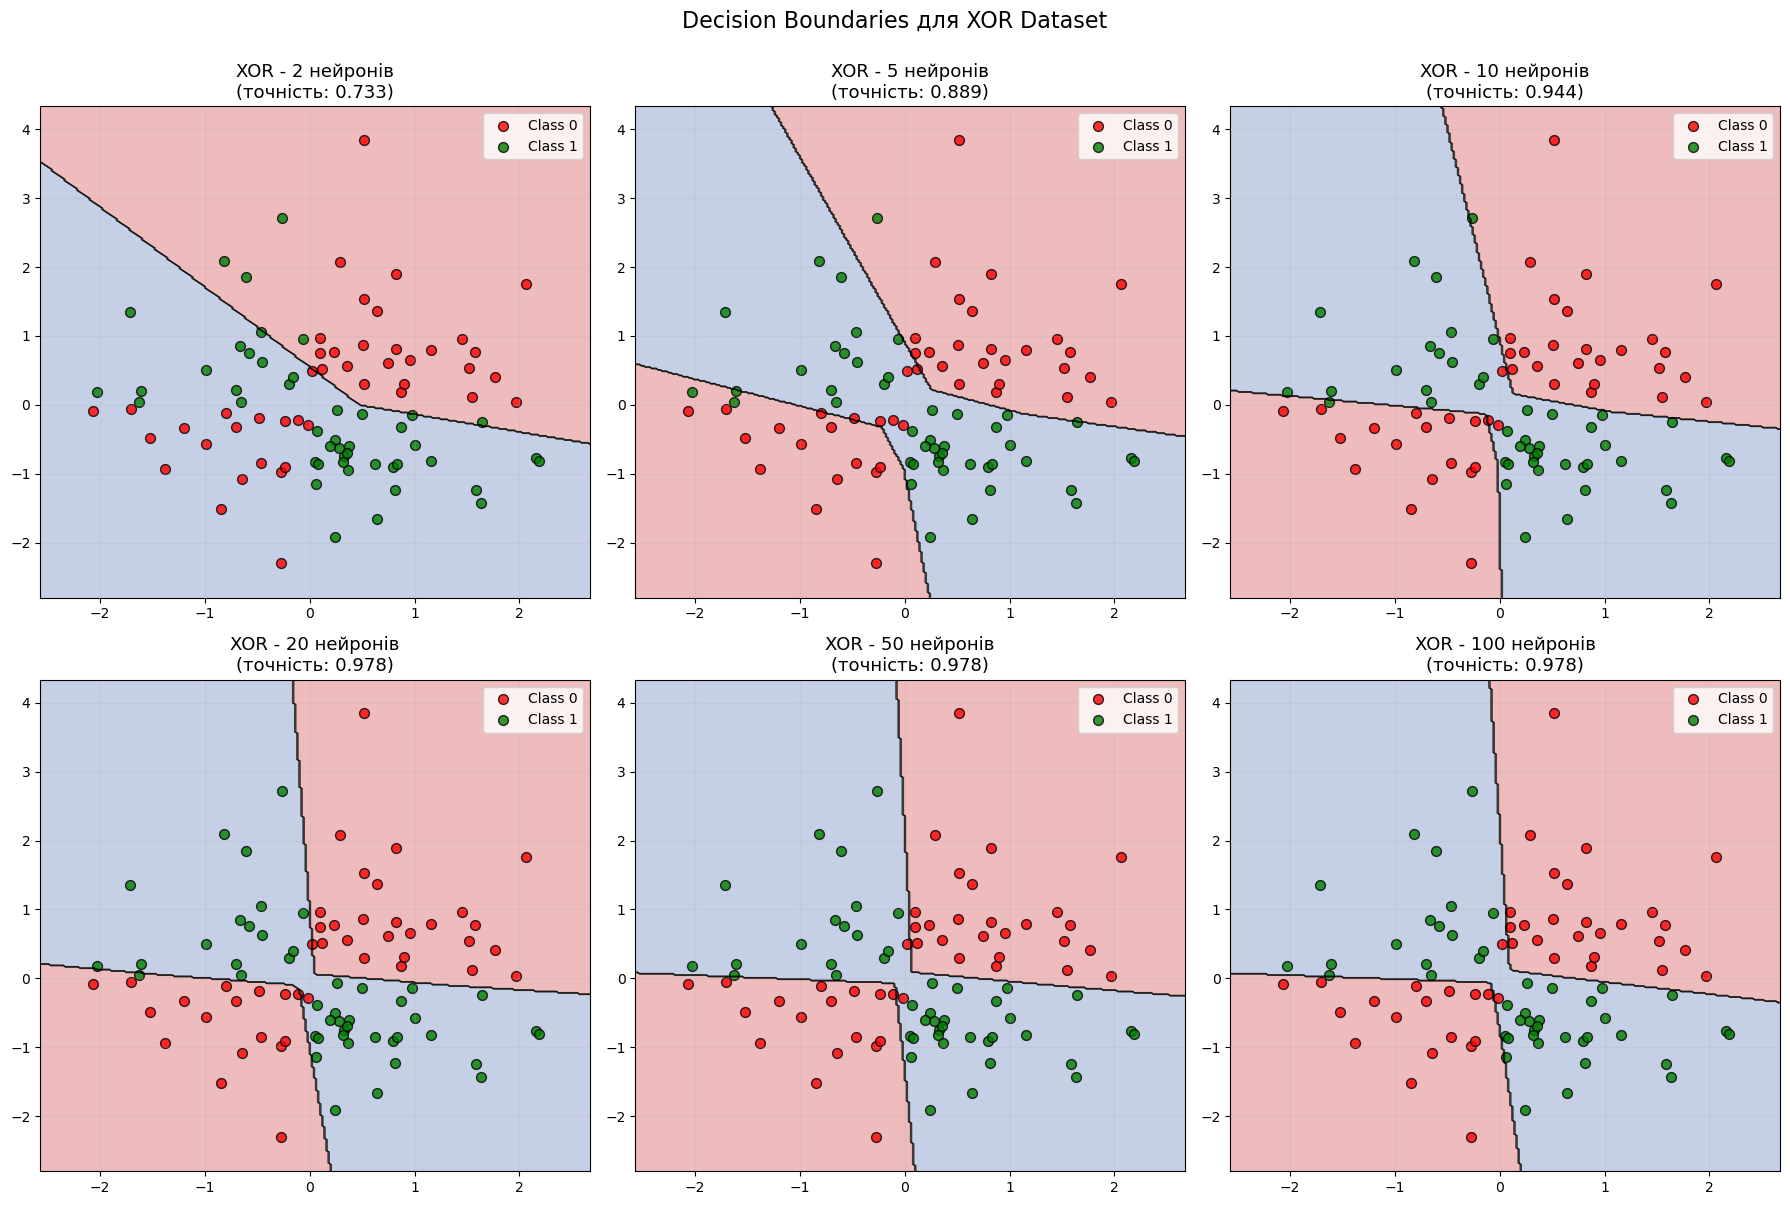

In [67]:
# Візуалізація для XOR Dataset
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

print("Створюємо візуалізацію меж прийняття рішень...")

# XOR - різні конфігурації одношарових моделей
for idx, n_neurons in enumerate([2, 5, 10]):
    model_idx = neuron_counts.index(n_neurons)
    model = results_xor['models'][model_idx]
    val_acc = results_xor['val_acc'][model_idx]
    
    plot_decision_boundary(
        model, X_xor_val, Y_xor_val, axes[0, idx],
        f'XOR - {n_neurons} нейронів\n(точність: {val_acc:.3f})',
        class_names=['Class 0', 'Class 1']
    )

# XOR - більш складні моделі
for idx, n_neurons in enumerate([20, 50, 100]):
    model_idx = neuron_counts.index(n_neurons)
    model = results_xor['models'][model_idx]
    val_acc = results_xor['val_acc'][model_idx]
    
    plot_decision_boundary(
        model, X_xor_val, Y_xor_val, axes[1, idx],
        f'XOR - {n_neurons} нейронів\n(точність: {val_acc:.3f})',
        class_names=['Class 0', 'Class 1']
    )

plt.suptitle('Decision Boundaries для XOR Dataset', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

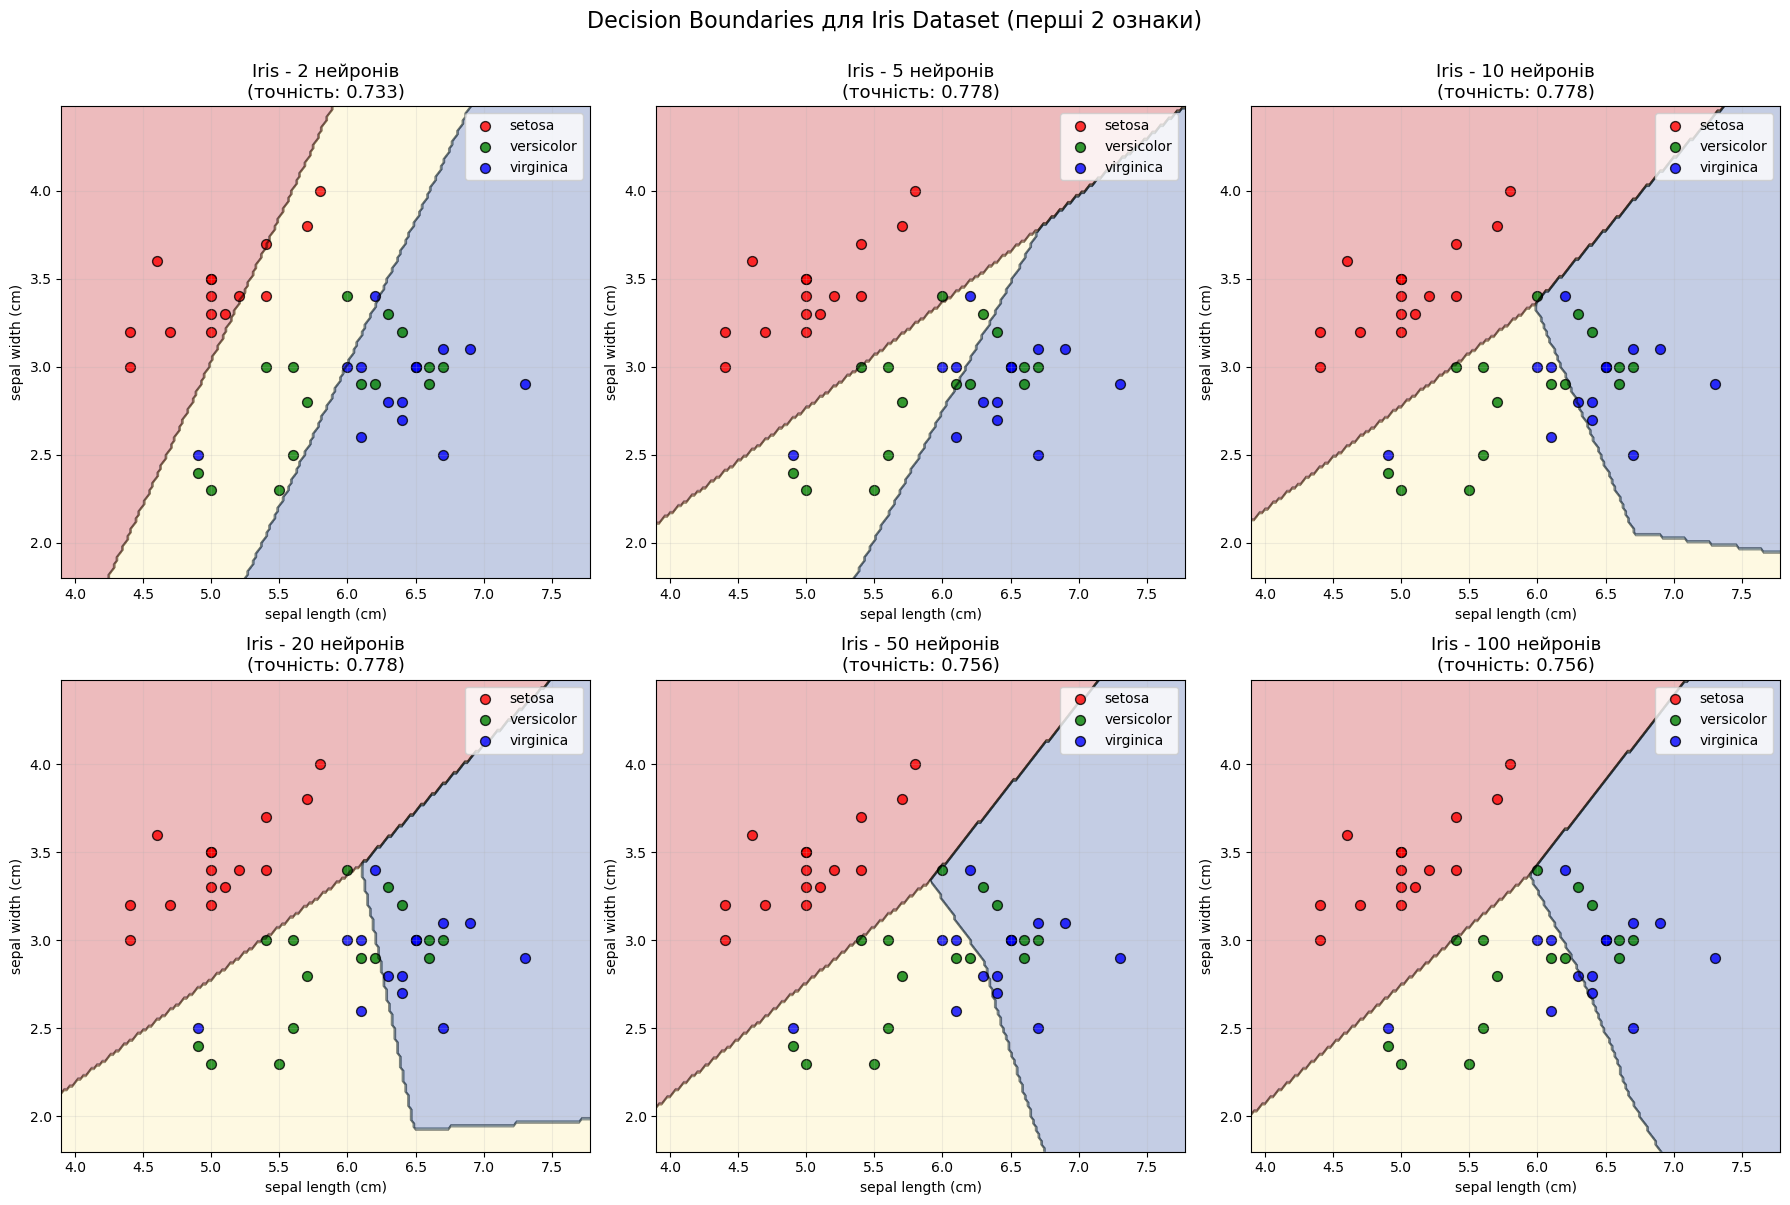

In [68]:
# Візуалізація для Iris Dataset (використовуємо перші 2 ознаки)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Беремо тільки перші 2 ознаки для візуалізації
X_iris_2d = X_iris[:, :2]
X_iris_train_2d, X_iris_val_2d, _, _ = train_test_split(
    X_iris_2d, Y_iris, test_size=0.3, random_state=42, stratify=Y_iris
)

# Навчаємо моделі на 2D даних
iris_models_2d = []
for n_neurons in [2, 5, 10, 20, 50, 100]:
    model = MLPClassifier(
        hidden_layer_sizes=(n_neurons,),
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42
    )
    model.fit(X_iris_train_2d, Y_iris_train)
    iris_models_2d.append(model)

# Візуалізація
for idx, n_neurons in enumerate([2, 5, 10]):
    model = iris_models_2d[idx]
    val_acc = accuracy_score(Y_iris_val, model.predict(X_iris_val_2d))
    
    plot_decision_boundary(
        model, X_iris_val_2d, Y_iris_val, axes[0, idx],
        f'Iris - {n_neurons} нейронів\n(точність: {val_acc:.3f})',
        class_names=target_names
    )
    axes[0, idx].set_xlabel(feature_names[0])
    axes[0, idx].set_ylabel(feature_names[1])

for idx, n_neurons in enumerate([20, 50, 100]):
    model = iris_models_2d[idx + 3]
    val_acc = accuracy_score(Y_iris_val, model.predict(X_iris_val_2d))
    
    plot_decision_boundary(
        model, X_iris_val_2d, Y_iris_val, axes[1, idx],
        f'Iris - {n_neurons} нейронів\n(точність: {val_acc:.3f})',
        class_names=target_names
    )
    axes[1, idx].set_xlabel(feature_names[0])
    axes[1, idx].set_ylabel(feature_names[1])

plt.suptitle('Decision Boundaries для Iris Dataset (перші 2 ознаки)', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

## Попередні результати, пункт 6

In [70]:
print("="*70)
print("ВИСНОВКИ")
print("="*70)

print("\n1. XOR DATASET:")
print(f"   - Найкраща одношарова модель: {best_neurons_xor} нейронів")
print(f"     Точність: {best_val_acc_xor:.4f}")
print(f"   - Найкраща багатошарова модель: {best_multi_config_xor}")
print(f"     Точність: {best_multi_val_xor:.4f}")
print(f"   - Для XOR задачі потрібна нелінійна модель")
print(f"   - Оптимально: одношарова модель")

print("\n2. IRIS DATASET:")
print(f"   - Найкраща одношарова модель: {best_neurons_iris} нейронів")
print(f"     Точність: {best_val_acc_iris:.4f}")
print(f"   - Найкраща багатошарова модель: {best_multi_config_iris}")
print(f"     Точність: {best_multi_val_iris:.4f}")
print(f"   - Iris dataset добре класифікується навіть простою моделлю")
print(f"   - Оптимально: одношарова модель")

print("\n3. ЗАГАЛЬНІ ВИСНОВКИ:")
print("   - Збільшення кількості нейронів покращує точність до певної межі")
print("   - Надто велика кількість нейронів може призвести до перенавчання")
print("   - Для простих задач достатньо одношарової моделі")
print("\n" + "="*70)

ВИСНОВКИ

1. XOR DATASET:
   - Найкраща одношарова модель: 1000 нейронів
     Точність: 0.9889
   - Найкраща багатошарова модель: (20, 20, 10)
     Точність: 0.9778
   - Для XOR задачі потрібна нелінійна модель
   - Оптимально: одношарова модель

2. IRIS DATASET:
   - Найкраща одношарова модель: 5 нейронів
     Точність: 1.0000
   - Найкраща багатошарова модель: (10, 10)
     Точність: 0.9778
   - Iris dataset добре класифікується навіть простою моделлю
   - Оптимально: одношарова модель

3. ЗАГАЛЬНІ ВИСНОВКИ:
   - Збільшення кількості нейронів покращує точність до певної межі
   - Надто велика кількість нейронів може призвести до перенавчання
   - Для простих задач достатньо одношарової моделі

